#Transformação e Diferenciação

##Importar Libs

In [ ]:
import pandas as pd                           #Manipulações de DataFrames e Séries
import numpy as np                            #Manipulações matemáticas
import warnings                               #Supressão de FutureWarnings
import scipy.stats as stats                   #Plotagem de gráficos Normalizados
import plotly.express as px                   #Criação de Gráficos interativos
import matplotlib.pyplot as plt               #Manipulações Gráficas
import statsmodels.tsa.stattools              #Realização de Testes Estátisticos
import plotly.figure_factory as ff            #Criação de Distplots Interativos
from matplotlib.pylab import rcParams         #Manipulação de parâmetros do matplotlib

Ajustando tamanho da figura (Maior Horizontalmente) e Suprimindo avisos

In [ ]:
rcParams['figure.figsize'] = 15, 6
warnings.filterwarnings('ignore')

##Transformação

###Criação da Série

AirPassengers: Dados clássicos da compainha aérea Box & Jerkins. Totais Mensais de passageiros de compainhas aéreas internacionais de 1949 à 1960.

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/AirPassengers.csv')
dados.columns = ['ano_mes', 'qt_passageiros']
dados.head()

,ano_mes,qt_passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Criação da Série

In [ ]:
serie = pd.Series(dados['qt_passageiros'].values, index = dados['ano_mes'])
serie

ano_mes
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

###Plotagem do Gráfico

Função para criação de gráficos interativos

In [ ]:
def GraficoInterativo(serie, x_label, y_label, title):
  fig = px.line(x=serie.index, y=serie)

  fig.update_layout(title = title,
                    xaxis_title=x_label,
                    yaxis_title=y_label)

  fig.show()

In [ ]:
GraficoInterativo(serie,'Anos','Valores','Quantidade de passageiro mensais de 1949 à 1960')

###Verificação à Normalidade

Criando Função Reutilizavel para Gráficos QQPlot

In [ ]:
def QQPlot(serie):
  stats.probplot(serie, dist='norm',plot=plt)
  plt.title('Normal QQ plot')
  plt.show()

QQ Plot

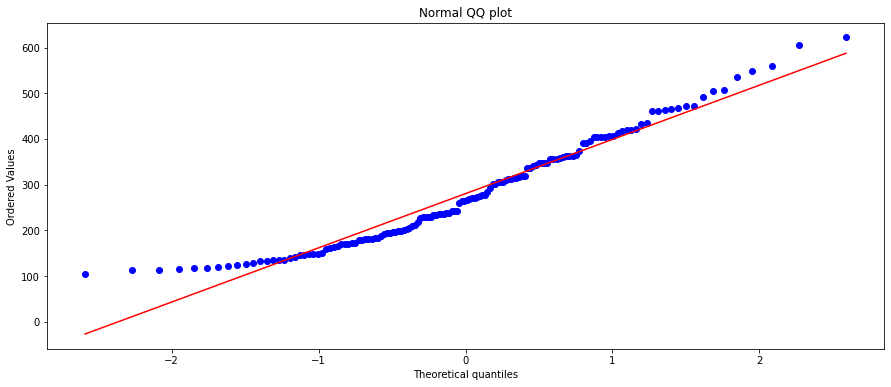

In [ ]:
QQPlot(serie)

Teste de Shapiro Wilk

Critérios:

Nível de Significância de 0,05 ou 5%

Quando p-value > 0,05 (Distribuição Normal)

In [ ]:
def Shapiro(serie):
  e, p = stats.shapiro(serie)

  print(f'Estátistica do Teste: {e}')
  print(f'p-value: {p}')

  if p > 0.05:
    print('Distribuição: Normal')
  else:
    print('Distribuição: Não Normal')

Avaliação dos Resultados

In [ ]:
Shapiro(serie)

Estátistica do Teste: 0.9519579410552979
p-value: 6.832739018136635e-05
Distribuição: Não Normal


###Transformação por Log

Diminuir variância e melhorar normalidade

In [ ]:
serie2 = np.log(serie)
serie2

ano_mes
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
             ...   
1960-08    6.406880
1960-09    6.230481
1960-10    6.133398
1960-11    5.966147
1960-12    6.068426
Length: 144, dtype: float64

Gráfico QQPlot

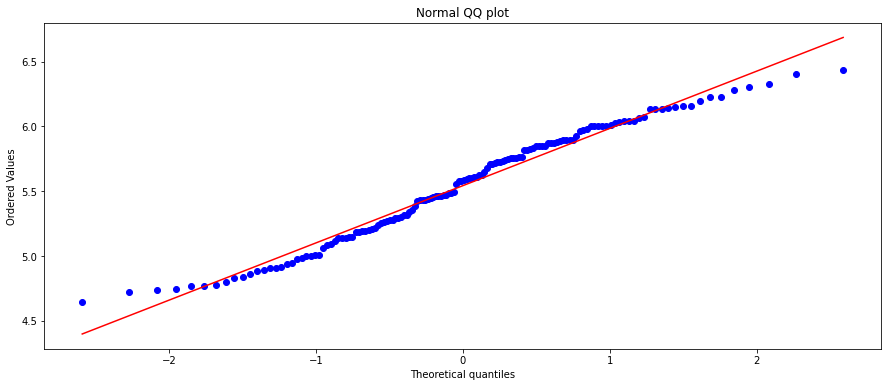

In [ ]:
QQPlot(serie2)

Teste de Shapiro

In [ ]:
Shapiro(serie2)

Estátistica do Teste: 0.973236083984375
p-value: 0.0063744960352778435
Distribuição: Não Normal


###Transformação por Raiz Cúbica (Quando possui dados com valor zero ou negativo)

In [ ]:
serie3 = (serie) ** (1/3)
serie3

ano_mes
1949-01    4.820285
1949-02    4.904868
1949-03    5.091643
1949-04    5.052774
1949-05    4.946087
             ...   
1960-08    8.462348
1960-09    7.979112
1960-10    7.725032
1960-11    7.306144
1960-12    7.559526
Length: 144, dtype: float64

Gráfico QQPlot

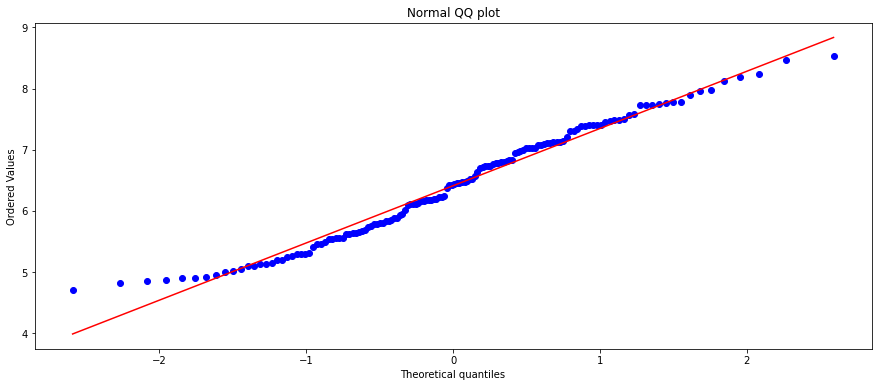

In [ ]:
QQPlot(serie3)

Teste de Shapiro

In [ ]:
Shapiro(serie3)

Estátistica do Teste: 0.974599301815033
p-value: 0.008835497312247753
Distribuição: Não Normal


###Comparação Dos Resultados

Função Reutilizavél para plotagem de Gráficos Interativos Distplot 

In [ ]:
def DistplotSerie(serie, label):
  fig = ff.create_distplot([serie.values],
                           [label],                   
                            show_rug=False)
  fig.data[0].autobinx = True
  fig.update_layout(title = f'Displot da {label}',
                    xaxis_title = 'Série',
                    yaxis_title = 'Frequência',                    
                    width=600, 
                    height=400,
                    bargap=0.01)
  fig.show()

Série1 (Original)

In [ ]:
DistplotSerie(serie, 'Serie1')

Série2 (LOG)

In [ ]:
DistplotSerie(serie2, 'Serie2')

Série3 (Raiz Cúbica)

In [ ]:
DistplotSerie(serie3, 'Serie3')

##Diferenciação

###Verificação com a série Original

####Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

* H0 = Não é estacionária: Estátistica do teste > valor crítico
* H1 = É estatacionária: Estátistica do teste < valor crítico

In [ ]:
def KPSS(serie):
  kpss = statsmodels.tsa.stattools.kpss(serie)

  print(f'Estátistica do teste: {kpss[0]}')
  print(f'p-value: {kpss[1]}')
  print('Valores Críticos:')

  #Inverter dicionário
  kpss_dic =dict(reversed(list(kpss[3].items())))

  for chave, valor in kpss_dic.items():
    if kpss[0] < valor:
      print(f'Estácionária à {chave}: {valor}')
    else:
      print(f'Não Estácionária à {chave}: {valor}')

Série 3

In [ ]:
KPSS(serie3)

Estátistica do teste: 1.0589453300371576
p-value: 0.01
Valores Críticos:
Não Estácionária à 1%: 0.739
Não Estácionária à 2.5%: 0.574
Não Estácionária à 5%: 0.463
Não Estácionária à 10%: 0.347


####Teste Dickey Fuller

* H0 = Não é estacionária: Estátistica do teste > valor crítico
* H1 = É estatacionária: Estátistica do teste < valor crítico

In [ ]:
def DickeyFuller(serie):
  df = statsmodels.tsa.stattools.adfuller(serie)

  print(f'Estátistica do teste: {df[0]}')
  print(f'p-value: {df[1]}')
  print('Valores Críticos:')

  for chave, valor in df[4].items():
    if df[0] < valor:
      print(f'Estácionária à {chave}: {valor}')
    else:
      print(f'Não Estácionária à {chave}: {valor}')

Série 3

In [ ]:
DickeyFuller(serie3)

Estátistica do teste: -0.8100350722186332
p-value: 0.8161565539700513
Valores Críticos:
Não Estácionária à 1%: -3.4816817173418295
Não Estácionária à 5%: -2.8840418343195267
Não Estácionária à 10%: -2.578770059171598


###Realizar Diferenciação

####Diferenciação de 1º Ordem

In [ ]:
serie4 = np.diff(serie3)

Plotar gráfico da diferenciação

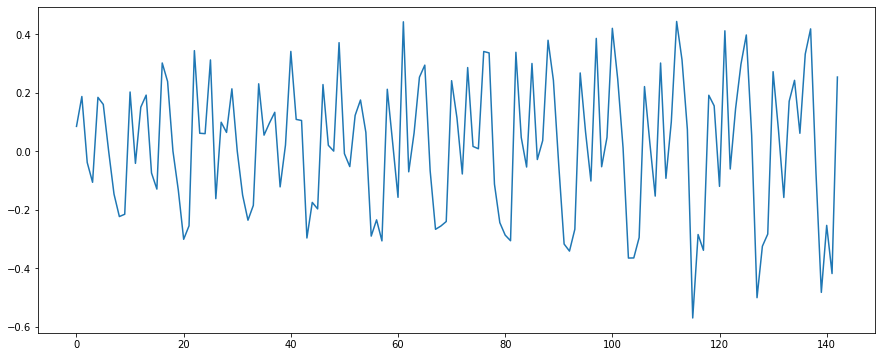

In [ ]:
plt.plot(serie4)
plt.show()

Comparar com dados originais

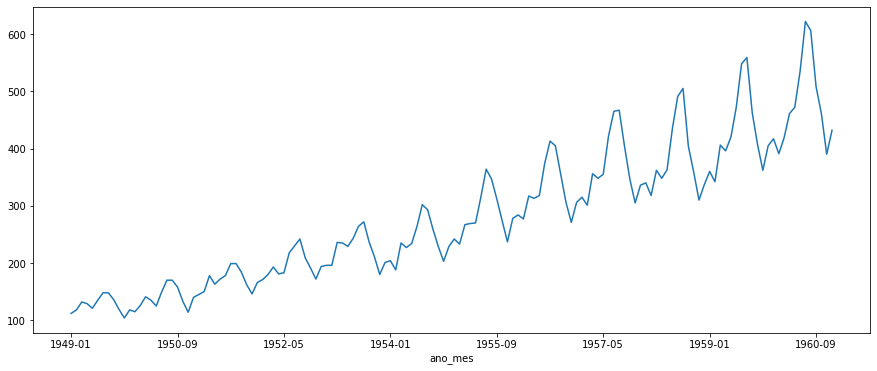

In [ ]:
serie.plot()
plt.show()

Cálculo Manual da diferenciação para serie 3 (normalizada)

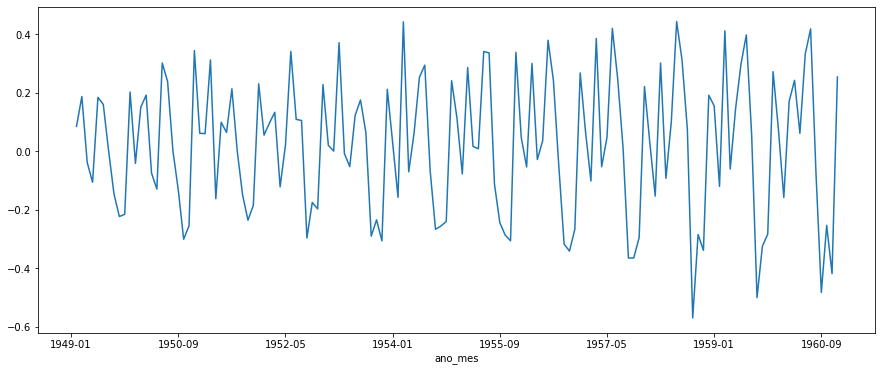

In [ ]:
serie_diff3 = serie3 - serie3.shift()

serie_diff3.plot()
plt.show()

Cálculo da diferenciação para a serie original (sem tentativas de normalização)

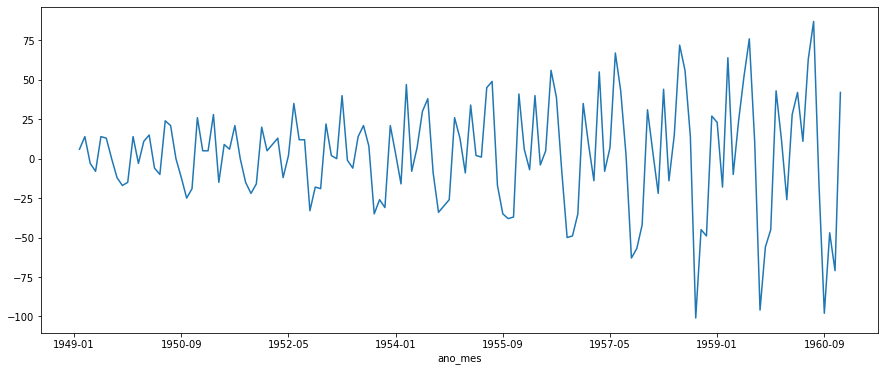

In [ ]:
serie_diff = serie - serie.shift()

serie_diff.plot()
plt.show()

**OBS:** Veja que apesar da diferenciação conseguir determinar a média constante, a variância da diferenciação da série original é maior que a da diferenciação da série 3. Veja por exemplo o inicio da série original tem picos menores (mais variantes com os demais).

Teste de KPSS

In [ ]:
KPSS(serie4)

Estátistica do teste: 0.07157782363721102
p-value: 0.1
Valores Críticos:
Estácionária à 1%: 0.739
Estácionária à 2.5%: 0.574
Estácionária à 5%: 0.463
Estácionária à 10%: 0.347


Teste de Dickey Fuller

In [ ]:
DickeyFuller(serie4)

Estátistica do teste: -3.199635374272781
p-value: 0.020005794891083308
Valores Críticos:
Não Estácionária à 1%: -3.4816817173418295
Estácionária à 5%: -2.8840418343195267
Estácionária à 10%: -2.578770059171598


####Diferenciação de 2º Ordem

In [ ]:
serie5 = np.diff(serie4)

Plotagem

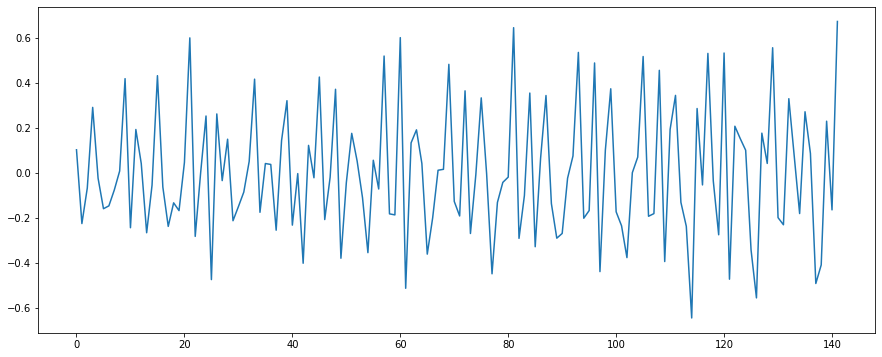

In [ ]:
plt.plot(serie5)
plt.show()

Teste de KPSS

In [ ]:
KPSS(serie5)

Estátistica do teste: 0.06344137862193942
p-value: 0.1
Valores Críticos:
Estácionária à 1%: 0.739
Estácionária à 2.5%: 0.574
Estácionária à 5%: 0.463
Estácionária à 10%: 0.347


Teste de Dickey Fuller

In [ ]:
DickeyFuller(serie5)

Estátistica do teste: -7.94618126476481
p-value: 3.215432204818599e-12
Valores Críticos:
Estácionária à 1%: -3.4825006939887997
Estácionária à 5%: -2.884397984161377
Estácionária à 10%: -2.578960197753906
